# EDA - Estado de Florida

En este archivo se realiza el ETL y el EDA de los archivos en el directorio data/raw/google-maps/reviews-estados/review-Florida. Previamente tendrá que filtrarse con los datos del dataset de metadata-sitios procesado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

# Ignorar advertencias
warnings.filterwarnings('ignore')

In [2]:
# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))

# Agregar la ruta del proyecto al sys.path para traer librerías personalizadas
sys.path.append(project_root)

In [3]:
# importar funciones personalizadas en src/utils
from src.utils.EDA import merge_files, get_frequency

## Extracción de Datos

In [4]:
# se guarda el directorio con los datasets en una variable
data_dir = os.path.join(project_root, 'data/raw/google_maps/reviews-estados/review-Florida')

# se utiliza la función merge_files para unir los archivos en un solo DataFrame
florida = merge_files(data_dir)

# Se verifica la estructura del DataFrame
florida.head(3)

Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\1.parquet
Archivo 1.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\10.parquet
Archivo 10.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\11.parquet
Archivo 11.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\12.parquet
Archivo 12.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\13.parquet
Archivo 13.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataSc

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,{'text': 'Thank you for the feedback. We would...,0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,{'text': 'Thank you for reaching out. I’m forw...,0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


## Filtrar Reviews de Servicios Gastronómicos

In [5]:
# se guarda el directorio con el datasets de metadata procesado en una variable
data_dir = os.path.join(project_root, 'data/processed/google_maps/metadata_final.parquet')

# leer parquet y visualizar los primeros elementos
metadata = pd.read_parquet(data_dir)
metadata.head(3)

,name,address,gmap_id,latitude,longitude,avg_rating,num_of_reviews,category
0,"""Best Mexican Food in Town""","""Best Mexican Food in Town"", 1130 S State St, ...",0x80816451cb67d913:0xa4553d4f3b03ec7,39.135483,-123.205517,4.3,3,[mexican restaurant]
1,"""Domenica alle Due"" - Robert Anthony's Italian...","""Domenica alle Due"" - Robert Anthony's Italian...",0x89e843ba6e1a9b9d:0x13f13f31d51ae5ce,40.951891,-72.984564,5.0,8,[italian restaurant]
2,"""Elotes Y Nachos"" El Toro","""Elotes Y Nachos"" El Toro, Arlington, TX 76010",0x864e87edad1b6373:0x288178eb4d631ed6,32.718081,-97.079521,4.4,8,[mexican restaurant]


In [26]:
# Filtrar los datos de florida donde gmap_id también esté en metadata y mostrar la nueva longitud
reviews = florida.merge(metadata, on='gmap_id', how='inner').reset_index()
len(reviews)

966915

## Eliminar Columnas Innecesarias

La columna pics no aporta material para el proyecto.

In [ ]:
# eliminar columna pics
reviews.drop(columns=['pics'], inplace=True, axis=1)

## Visualización de Datos

### Vista Rápida
Se realiza un breve vistazo de los datos.

In [27]:
# se verifica la estructura del dataframe filtrado
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966915 entries, 0 to 966914
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           966915 non-null  int64  
 1   user_id         966915 non-null  float64
 2   name_x          966915 non-null  object 
 3   time            966915 non-null  int64  
 4   rating          966915 non-null  int64  
 5   text            589536 non-null  object 
 6   pics            38512 non-null   object 
 7   resp            128269 non-null  object 
 8   gmap_id         966915 non-null  object 
 9   name_y          966915 non-null  object 
 10  address         966915 non-null  object 
 11  latitude        966915 non-null  float64
 12  longitude       966915 non-null  float64
 13  avg_rating      966915 non-null  float64
 14  num_of_reviews  966915 non-null  int64  
 15  category        966915 non-null  object 
dtypes: float64(4), int64(4), object(8)
memory usage: 118.0+ 

In [28]:
# comprensión de variables numéricas
reviews.describe()

,index,user_id,time,rating,latitude,longitude,avg_rating,num_of_reviews
count,966915.000000,9.669150e+05,9.669150e+05,966915.000000,966915.000000,966915.000000,966915.000000,966915.000000
mean,483457.000000,1.092325e+20,1.555531e+12,4.231885,27.942183,-81.749149,4.181574,1693.208494
std,279124.462104,5.321390e+18,4.053243e+10,1.153122,1.432970,1.460633,0.396660,1405.270670
min,0.000000,1.000000e+20,1.041379e+12,1.000000,24.550387,-87.333840,1.500000,8.000000
25%,241728.500000,1.046346e+20,1.529675e+12,4.000000,26.650757,-82.454733,4.000000,778.000000
50%,483457.000000,1.092259e+20,1.556461e+12,5.000000,28.011572,-81.550936,4.300000,1342.000000
75%,725185.500000,1.138418e+20,1.581856e+12,5.000000,28.597119,-80.633196,4.500000,2158.000000
max,966914.000000,1.184467e+20,1.631069e+12,5.000000,30.944799,-80.050159,5.000000,8116.000000


In [29]:
# visualizar primeras filas
reviews.head(3)

,index,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,latitude,longitude,avg_rating,num_of_reviews,category
0,0,1.089733e+20,Johnny McMuffin,1534506921535,4,Nice little outdoor Tiki Bar at the Holiday In...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"
1,1,1.183531e+20,Jesse Peterson,1564493738143,4,"Nice buffet, kitchen staff provided good food....",None,None,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"
2,2,1.060498e+20,Art Stadlin,1353454773013,5,We ate a light lunch before our cruise. Nice ...,None,None,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"


### Visualización de los Datos

#### Distribución General de Calificaciones (rating)
Un gráfico de barras para las categorías ayudará a entender las frecuencias y a encontrar las categorías con mayor cantidad de reseñas.

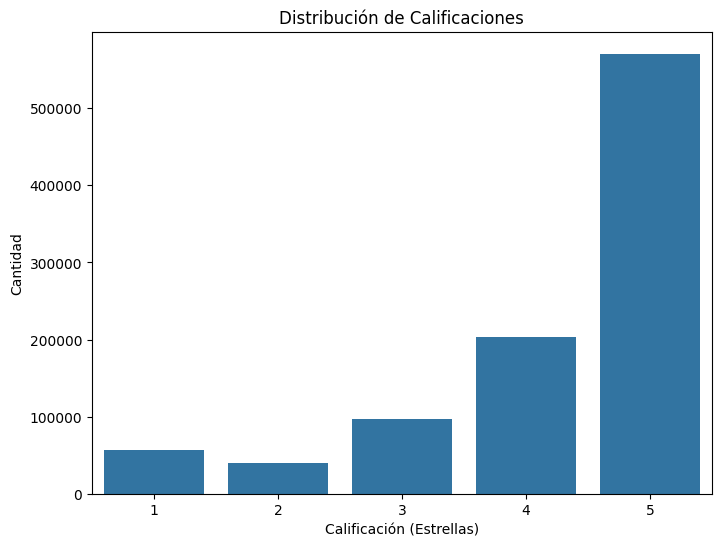

In [ ]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=reviews)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación (Estrellas)')
plt.ylabel('Cantidad')
plt.show()

Puede notarse que la mayoría de los usuarios tienden a calificar con 5 estrellas y que la minoría califica con 2.

#### Respuesta a Reseñas (resp)
Usa un gráfico circular o de barras para la columna resp (donde 1 significa que hubo respuesta y 0 que no la hubo) para visualizar qué tan frecuentemente los locales responden a las reseñas.

AttributeError: Rectangle.set() got an unexpected keyword argument 'kind'

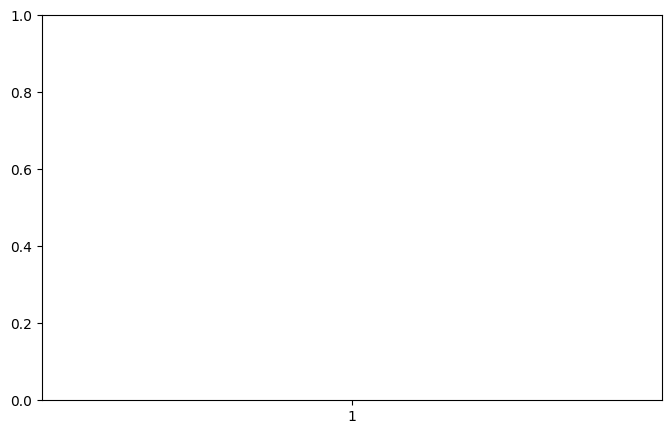

In [ ]:
# Convertir valores de `resp` a binarios
reviews['resp'] = reviews['resp'].notna().astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(x='resp', data=reviews)
plt.title('Frecuencia de Respuesta a Reseñas')
plt.xlabel('Respuesta a la Reseña (1: Sí, 0: No)')
plt.ylabel('Frecuencia')
plt.show()